# Testing K nearest neigbours

Using the features file to separate into labels and features

In [38]:
import pandas as pd
import numpy as np

data = pd.read_csv('./util/feature_dataset.csv') 
data.fillna(0, inplace=True)
X = data[['border', 'asymmetry', 'Blue-gray']]
#, 'White', 'Black', 'Red', 'Light-brown', 'Dark-brown', 'Blue-gray'

data['cancer'] = data['cancer'].astype(int)
y = data['cancer']
groups = data['patient_id']
unique_patients = data['patient_id'].unique()

Checking features

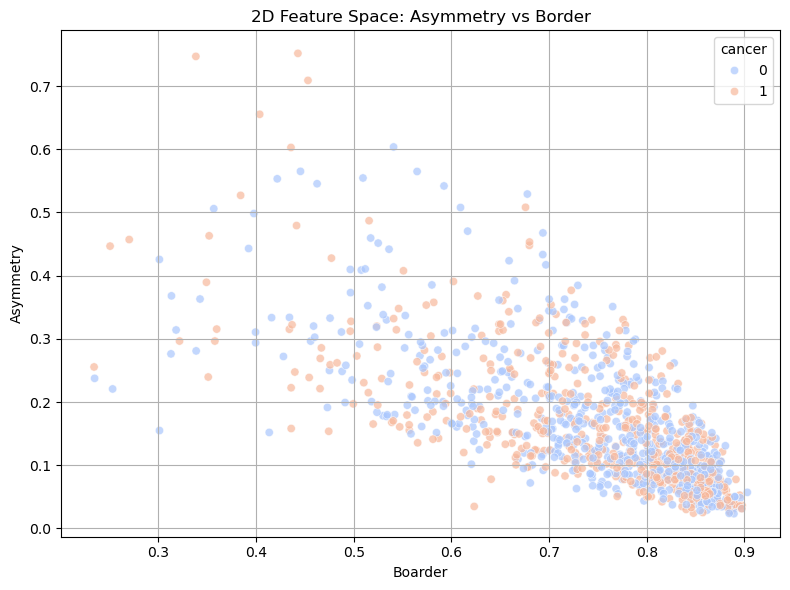

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=data, 
    x='border', 
    y='asymmetry', 
    hue='cancer', 
    palette='coolwarm', 
    alpha=0.7
)
plt.title("2D Feature Space: Asymmetry vs Border")
plt.xlabel("Boarder")
plt.ylabel("Asymmetry")
plt.grid(True)
plt.tight_layout()
plt.show()


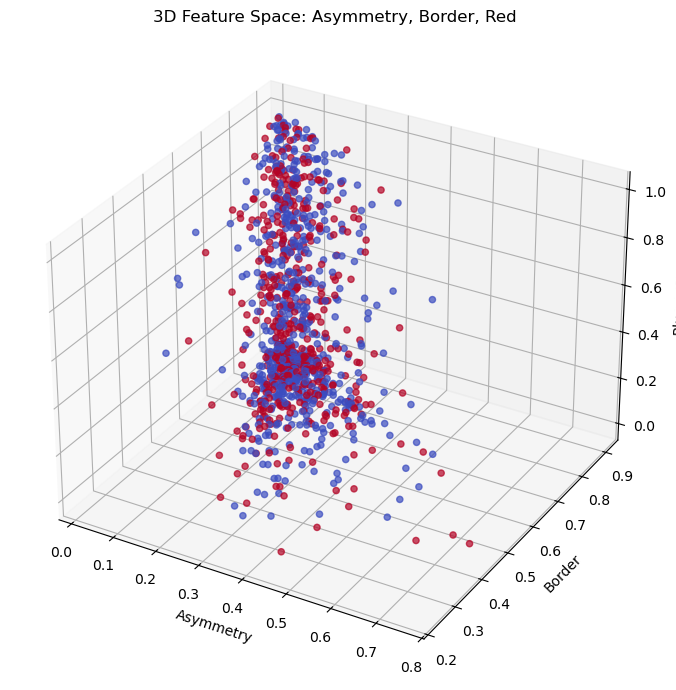

In [32]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot
ax.scatter(
    data['asymmetry'], 
    data['border'], 
    data['Blue-gray'], 
    c=data['cancer'], 
    cmap='coolwarm', 
    alpha=0.7
)

ax.set_title("3D Feature Space: Asymmetry, Border, Red")
ax.set_xlabel("Asymmetry")
ax.set_ylabel("Border")
ax.set_zlabel("Blue-gray")
plt.tight_layout()
plt.show()


Running cross-validation over different k values (get AUC)

In [39]:
from sklearn.model_selection import train_test_split, GroupKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline

#split data into training and test sets (by patient ID)
unique_patients = data['patient_id'].unique()
train_ids, test_ids = train_test_split(unique_patients, test_size=0.2, random_state=42)
train_idx = data['patient_id'].isin(train_ids)

X_train, y_train = X[train_idx], y[train_idx]
groups_train = groups[train_idx]

#standardScaler on training data (within pipeline below)
#GroupKFold CV with k from 3 to 10
cv = GroupKFold(n_splits=5)
k_values = range(1, 101, 2)
summary = []

for k in k_values:
    pipe = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=k))
    auc_scores = cross_val_score(pipe, X_train, y_train, cv=cv, groups=groups_train, scoring='roc_auc')
    mean_auc = np.mean(auc_scores)
    std_auc = np.std(auc_scores)
    print(f"k={k}, AUC={mean_auc:.4f} ± {std_auc:.4f}")
    summary.append({'k': k, 'mean_auc': mean_auc, 'std_auc': std_auc})

summary_df = pd.DataFrame(summary)

k=1, AUC=0.5036 ± 0.0323
k=3, AUC=0.4788 ± 0.0131
k=5, AUC=0.4853 ± 0.0220
k=7, AUC=0.5112 ± 0.0291
k=9, AUC=0.5126 ± 0.0374
k=11, AUC=0.5082 ± 0.0275
k=13, AUC=0.5170 ± 0.0386
k=15, AUC=0.5144 ± 0.0298
k=17, AUC=0.5195 ± 0.0203
k=19, AUC=0.5030 ± 0.0313
k=21, AUC=0.4946 ± 0.0353
k=23, AUC=0.4892 ± 0.0296
k=25, AUC=0.4844 ± 0.0269
k=27, AUC=0.4806 ± 0.0283
k=29, AUC=0.4811 ± 0.0289
k=31, AUC=0.4835 ± 0.0319
k=33, AUC=0.4882 ± 0.0220
k=35, AUC=0.4797 ± 0.0218
k=37, AUC=0.4795 ± 0.0207
k=39, AUC=0.4804 ± 0.0269
k=41, AUC=0.4881 ± 0.0239
k=43, AUC=0.4991 ± 0.0282
k=45, AUC=0.5015 ± 0.0271
k=47, AUC=0.5065 ± 0.0194
k=49, AUC=0.5078 ± 0.0140
k=51, AUC=0.5144 ± 0.0152
k=53, AUC=0.5093 ± 0.0146
k=55, AUC=0.5070 ± 0.0165
k=57, AUC=0.5078 ± 0.0122
k=59, AUC=0.5081 ± 0.0104
k=61, AUC=0.5140 ± 0.0121
k=63, AUC=0.5125 ± 0.0146
k=65, AUC=0.5096 ± 0.0096
k=67, AUC=0.5099 ± 0.0127
k=69, AUC=0.5088 ± 0.0143
k=71, AUC=0.5102 ± 0.0229
k=73, AUC=0.5082 ± 0.0211
k=75, AUC=0.5044 ± 0.0150
k=77, AUC=0.5048 

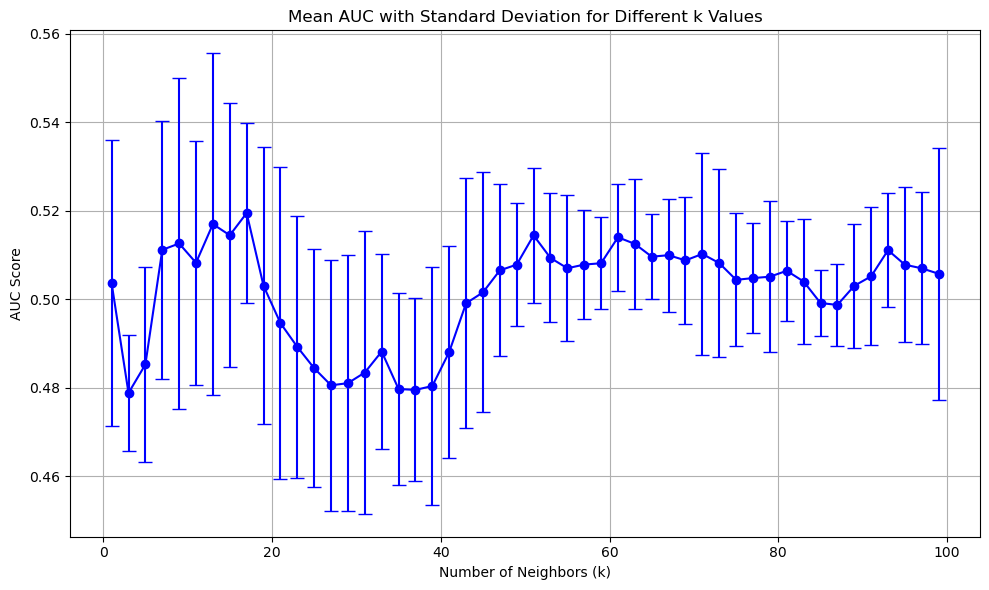

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.errorbar(summary_df['k'], summary_df['mean_auc'], yerr=summary_df['std_auc'], 
             fmt='-o', capsize=5, color='blue')
plt.title('Mean AUC with Standard Deviation for Different k Values')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('AUC Score')
plt.grid(True)
plt.tight_layout()
plt.show()